In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/sentisum/sentisum-assessment-dataset.csv')

count    10132.000000
mean        22.446407
std         31.514313
min          1.000000
25%          7.000000
50%         13.000000
75%         26.000000
max        626.000000
Name: text, dtype: float64


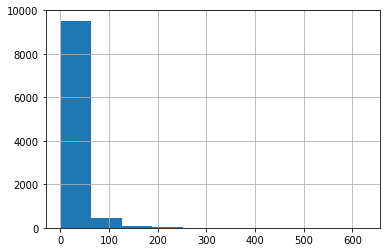

In [3]:
lens = df.text.str.split().apply(lambda x: len(x))
print(lens.describe())
lens.hist()

In [29]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stops =  set(stopwords.words('english')+['com'])
co = CountVectorizer(stop_words=stops)
counts = co.fit_transform(df.text)
pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(200)

,0
tyres,4601
service,4600
good,3481
easy,2721
great,2488
...,...
top,113
options,112
going,110
sent,109


In [11]:
co = CountVectorizer(ngram_range=(2,2),stop_words=stops)
counts = co.fit_transform(df.text)
pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(2000)

,0
great service,760
easy use,708
good price,704
excellent service,691
good service,522
...,...
happy purchase,6
fitted straight,6
hours get,6
hours fit,6


In [18]:
from tqdm import tqdm

In [19]:
words = pd.read_table('https://raw.githubusercontent.com/dwyl/english-words/master/words.txt')
words.columns=['word']
words = words['word'].str.lower().values.tolist()
df['clean_text'] = df.text.apply(lambda x: ' '.join([i for i in x.split(' ') if not (i.startswith('@') or i.startswith('#'))]))
df['clean_text'] = df.clean_text.str.lower().str.replace('[^a-zA]', ' ')
non_list = {}
for sent in tqdm(df.clean_text.str.split().values):
  for token in sent:
    if token not in words:
      non_list[token] = 1 if token not in non_list else non_list[token]+1
pd.Series(non_list).sort_values(ascending=False).head(30)

100%|██████████| 10132/10132 [16:18<00:00, 10.35it/s]


website         607
hadn             57
emails           47
euromaster       24
mcconechy        22
kwik             20
tyers            19
competative      17
bridgestone      17
definately       13
silverburn       12
defo             11
hiq              11
recieved         10
reccomend         9
crossclimate      8
recomend          8
recomended        8
tesco             8
bathwick          8
motorhome         7
vfm               7
paypal            7
dustcaps          7
definetly         6
tpms              6
asda              6
protyre           6
handforth         6
exellent          6
dtype: int64

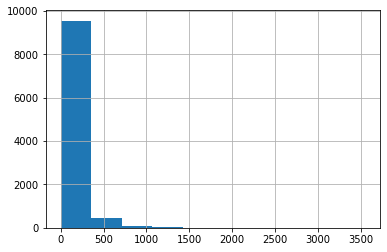

In [24]:
df['text'].str.len().hist()

In [36]:
from nltk.corpus import stopwords
stop =  set(stopwords.words('english'))

In [42]:
corpus=[]
df1= df['text'].str.split()
df1=df1.values.tolist()
corpus=[word for i in df1 for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        

<BarContainer object of 10 artists>

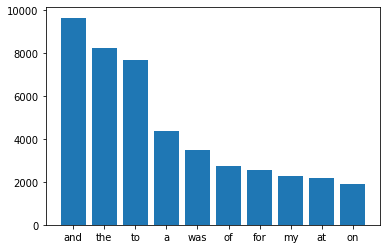

In [44]:
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

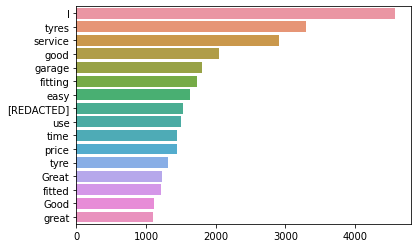

In [47]:
from collections import Counter
import seaborn as sns

counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

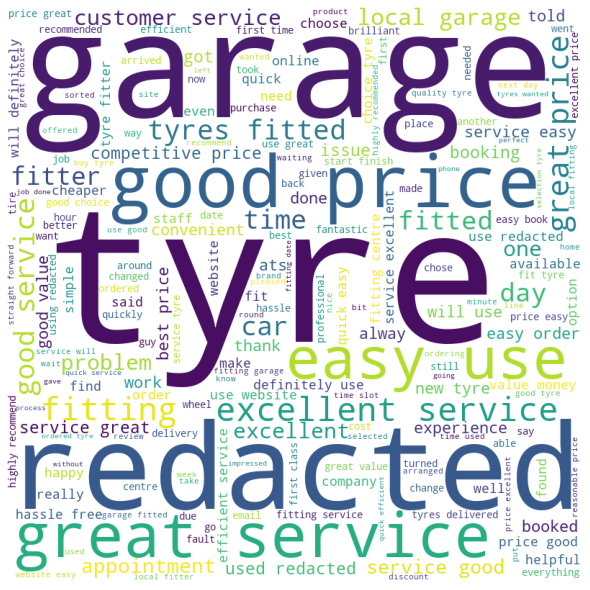

In [23]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
 
# Reads 'Youtube04-Eminem.csv' file
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()